In [1]:
# numerical module
import numpy as np

#setup plotting 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('SciencePlots-APS.mplstyle')

## Bandstructure and DOS

In [2]:
# module to load bandstructure data
def read_band(fname, EFermi):
    band_pw = np.loadtxt(fname)
    EF = EFermi
    kDist = np.unique(band_pw[:, 0])
    BandsPW = (np.reshape(band_pw[:, 1], (-1, len(kDist))).T) - EF
    return kDist, BandsPW
# module to load dos data
def read_dos(fname, EFermi):
    En, dos, idos = np.loadtxt(fname, unpack=True)
    En -= EFermi
    return En, dos
# module to load pdos data
def read_pdos(fname, EFermi):
    ener, pdos = np.loadtxt(fname, usecols=(0,1), unpack=True)
    ener -= EFermi
    return ener, pdos

In [3]:
# load bandstructure
kDist, Band = read_band('../band/CsSnI3.bands.gnu', EFermi=4.7016)
# high-symmetry point from prefix.band.out
kNode = np.array([0.0, 0.866, 1.366, 1.866, 2.5731])
# label of high-symmetry
kLabel = (r'R', r'$\Gamma$', r'X', r'M', r'$\Gamma$')

# load dos
Eneg, Dos = read_dos('../dos/CsSnI3.dos', EFermi=4.7016)

NumOccupied = 21   # 22th bands

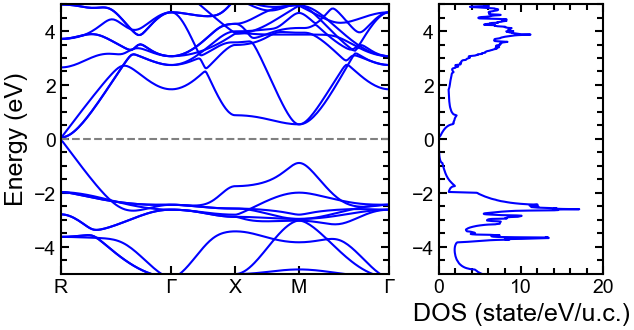

In [4]:
# plotting
fig = plt.figure(figsize=(7, 3.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[6, 3]) 

axE = plt.subplot(gs[0])
axD = plt.subplot(gs[1])

#------------------------#
# plot bandstructure
#------------------------#
for i in range(0, Band.shape[1]):
    axE.plot(kDist, Band[:, i], color='blue', lw=1.5)
# X-axis
axE.set_xlim(kNode[0], kNode[-1])
axE.set_xticks(kNode)
axE.set_xticklabels(kLabel)
axE.tick_params(axis='x', which='minor', bottom=False, top=False)
# Y-axis
axE.set_ylabel('Energy (eV)')
axE.set_ylim(-5.0, 5.0)
axE.axhline(0, color='gray', ls='--', lw=1.5)

#------------------------#
# plot density-of states
#------------------------#
axD.plot(Dos, Eneg, 'b-', lw=1.5)
# X-axis
axD.set_xlabel('DOS (state/eV/u.c.)')
axD.set_xlim(0, 20)
# Y-axis
axD.set_ylim(-5.0, 5.0)

# save figure
fig.savefig('./dispersion-relation-CsSnI3.png', dpi=600)
plt.show()

## Partial density-of-states

In [5]:
# read pdos data
## for s-orbital each atoms
## Cs
EnCs_s, pdosCs_s = read_pdos('../projwfc/CsSnI3.pdos_atm#1(Cs)_wfc#2(s)', EFermi=4.7016) 
## Sn
EnSn_s, pdosSn_s = read_pdos('../projwfc/CsSnI3.pdos_atm#2(Sn)_wfc#1(s)', EFermi=4.7016)
## I
EnI_s, pdosI_s = read_pdos('../projwfc/CsSnI3.pdos_atm#3(I)_wfc#1(s)', EFermi=4.7016)

## for p-orbital each atoms
## Cs
EnCs_p, pdosCs_p = read_pdos('../projwfc/CsSnI3.pdos_atm#1(Cs)_wfc#3(p)', EFermi=4.7016)
## Sn
EnSn_p, pdosSn_p = read_pdos('../projwfc/CsSnI3.pdos_atm#2(Sn)_wfc#2(p)', EFermi=4.7016)
## I
EnI_p, pdosI_p = read_pdos('../projwfc/CsSnI3.pdos_atm#3(I)_wfc#2(p)', EFermi=4.7016)

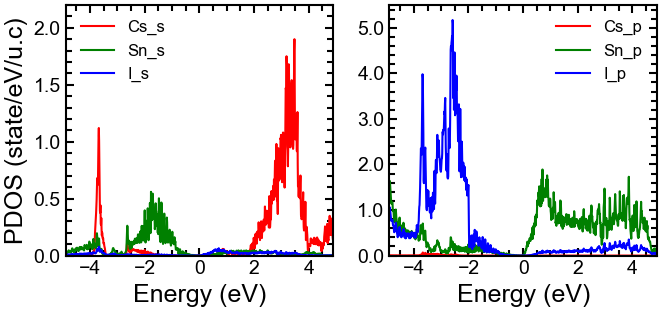

In [6]:
# plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5))

#------------------------#
# s-orbital
#------------------------#
axes[0].plot(EnCs_s, pdosCs_s, 'r-', lw=1.5, label='Cs_s')
axes[0].plot(EnSn_s, pdosSn_s, 'g-', lw=1.5, label='Sn_s')
axes[0].plot(EnI_s, pdosI_s, 'b-', lw=1.5, label='I_s')
# X-axis
axes[0].set_xlabel('Energy (eV)')
axes[0].set_xlim(-4.9, 4.9)
axes[0].set_xticks([-4.0, -2.0, 0., 2., 4.])
# Y-axis
axes[0].set_ylabel('PDOS (state/eV/u.c)')
axes[0].set_ylim(0., 2.2)
axes[0].set_yticks([0.0, 0.5, 1.0, 1.5, 2.0])

axes[0].legend(loc='best', prop={'size': 12})

#------------------------#
# p-orbital
#------------------------#
axes[1].plot(EnCs_p, pdosCs_p, 'r-', lw=1.5, label='Cs_p')
axes[1].plot(EnSn_p, pdosSn_p, 'g-', lw=1.5, label='Sn_p')
axes[1].plot(EnI_p, pdosI_p, 'b-', lw=1.5, label='I_p')
# X-axis
axes[1].set_xlabel('Energy (eV)')
axes[1].set_xlim(-4.9, 4.9)
axes[1].set_xticks([-4.0, -2.0, 0., 2., 4.])
# Y-axis
axes[1].set_ylim(0., 5.5)
axes[1].set_yticks([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
axes[1].set_yticklabels(['0.0', '1.0', '2.0', '3.0', '4.0', '5.0'])
axes[1].legend(loc='best', prop={'size': 12})

plt.tight_layout()
# save figure
fig.savefig('./pdos-CsSnI3.png', dpi=600)
plt.show()

In [7]:
def bandgap_value(VBM, CBM):
    return CBM-VBM

VBM = 4.6614
CBM = 4.7511

print('Bandgap value using PBEsol for CsSnI3 = {:.4f} eV'.format(bandgap_value(VBM, CBM)))

Bandgap value using PBEsol for CsSnI3 = 0.0897 eV
